<a href="https://colab.research.google.com/github/evmpython/aula_pratica_pluviometros_CAT205/blob/main/aula_pratica_pluviometros_CAT205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disciplina:** CAT010 - Meteorologia Física


---
## **Aula Prática 3:** $\underline{Trabalhando\ com\ dados\ de\ Estações\ Meteorológicas}$

---


**OBJETIVO:** Nesta aula prática aprenderemos como baixar e trabalhar com dados de **Estações Meteorológicas de Superfície (EMS)** do INMET. Para isto será utilizado a blioteca HydroBr. O [`HydroBr`](https://github.com/hydrobr/hydrobr) é um pacote criado pelo engenheiro [Wallisson Carvalho](https://wallissoncarvalho.github.io/about/) e é feito para quem trabalha com séries temporais hidrometeorológicas das estações da **Agência Nacional de Águas** (ANA), do **Instituto Nacional de Meteorologia** (INMET) e do **Operador Nacional do Sistema Elétrico** (ONS).

---


**DADOS DE ENTRADA**: Arquivos texto de estações meteorológicas.

O acesso é realizado via Plataforma de Entrega de Dados (PED): http://ped.cemaden.gov.br/

Informações sobre as estações: http://ped.cemaden.gov.br/ConsultarRedeEstacoes

https://mapainterativo.cemaden.gov.br/#

- **Tipo do dado:** tabela  
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** Não tem
- **Fonte dos dados:** INMET


---

**DADOS DE SAÍDA:** Figura e arquivo CSV
- **Tipo do dado:** Figura e tabela
- **Formato do dado:** arquivo JPG e CSV
- **Imagens geradas:**
    1. Fig1a_horario_climatologia_precipitacao.jpg
    2. Fig1b_horario_climatologia_radiacao_temperatura.jpg
    3. Fig2_diario_precipitacao.jpg
    4. Fig3a_mensal_precipitacao.jpg
    5. Fig3b_mensal_climatologia_precipitacao.jpg
    6. Fig4_anual_precipitacao.jpg
    7. tabela_mensal.csv



---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:

1.   Instação das bibliotecas **hydrobr** e **proplot**
2.   Importação das biblotecas
3.   Download e tratamento dos dados
4.   Plotar gráfico do **ciclo horário**
5.   Plotar gráfico do **ciclo diário**
6.   Plotar gráfico do **ciclo mensal**
7.   Plotar gráfico do **ciclo anual**
8.   Salvar os dados em arquivo **csv**


---

- **Todas** as estações retornam as seguintes variáveis:
    1. T: Temperatura (Tinst, Tmax e Tmin) [C]
    2. RH: Umidade Relativa (RHins, RHmax e RHmin) [%];
    3. DP: Temperatura do Ponto de Orvalho (DPinst, DPmax, DPmin) [C]
    4. P: Pressão Atmosférica (Pinst, Pmax, Pmin) [hPa]
    5. Wspeed: Velocidade do Vento [m/s]
    6. Wdir: Direção do Vento [º]
    7. Rad: Radiação [kJ/m²]
    8. Prec: Precipitação [mm]



---




**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o do seu drive.
2. Vocês deverão escolher a estação de superfície pelo **código**.



---


- **Realizado por:** [Willy Hagi](https://taggo.one/willyhagi) da Meteonorte
- **Atualizado por:** Enrique V. Mattos - 21/11/2022

https://www.gov.br/cemaden/mapainterativo/

**Exemplo 1:** Precipitação por dia

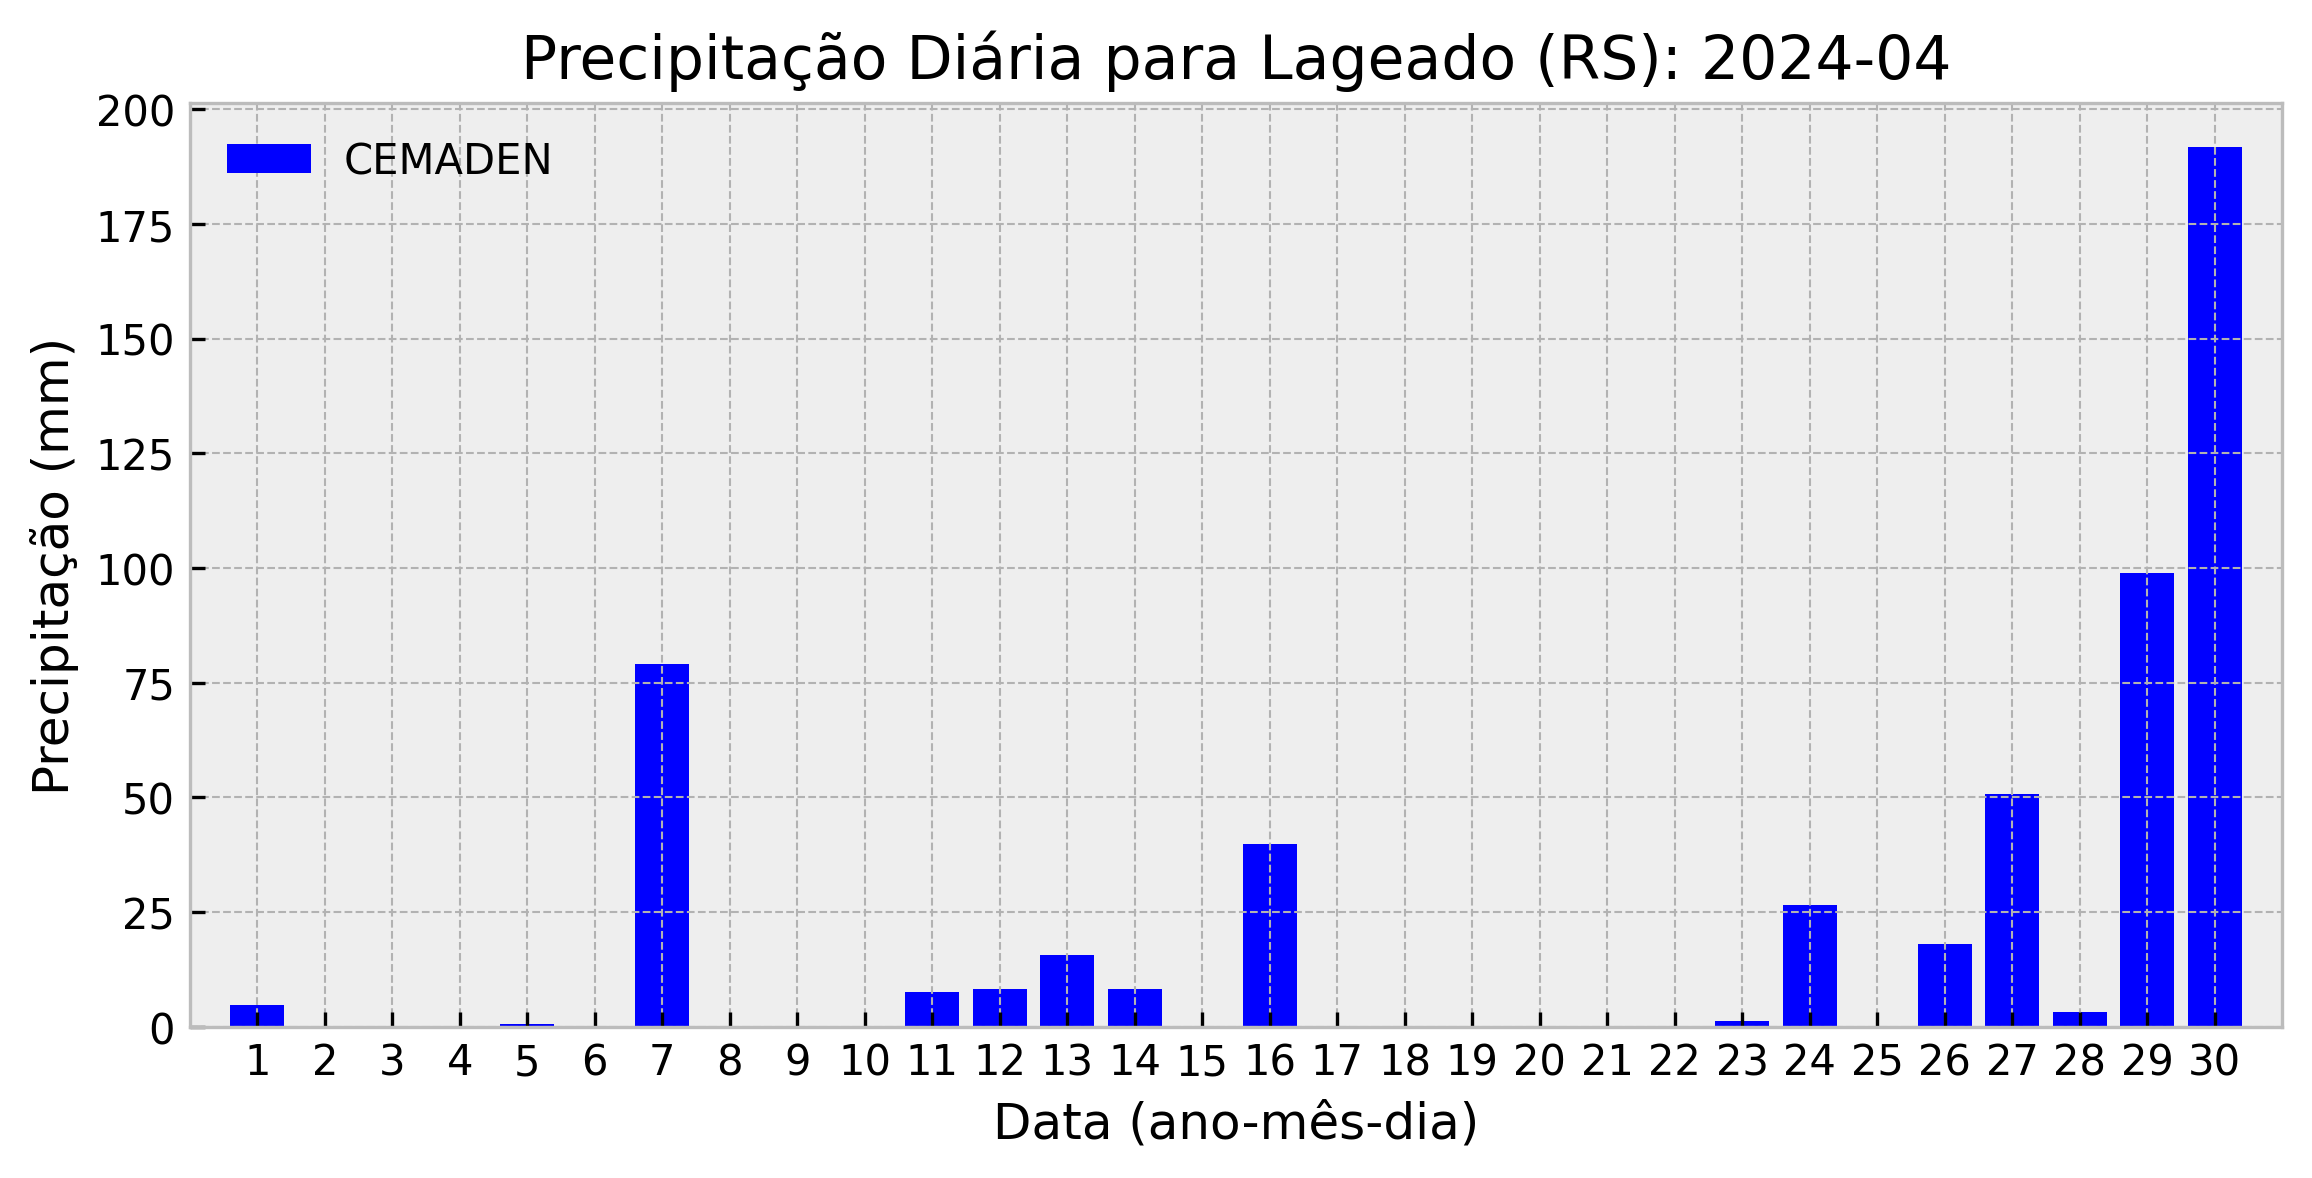

**Exemplo 2:** Precipitação por hora

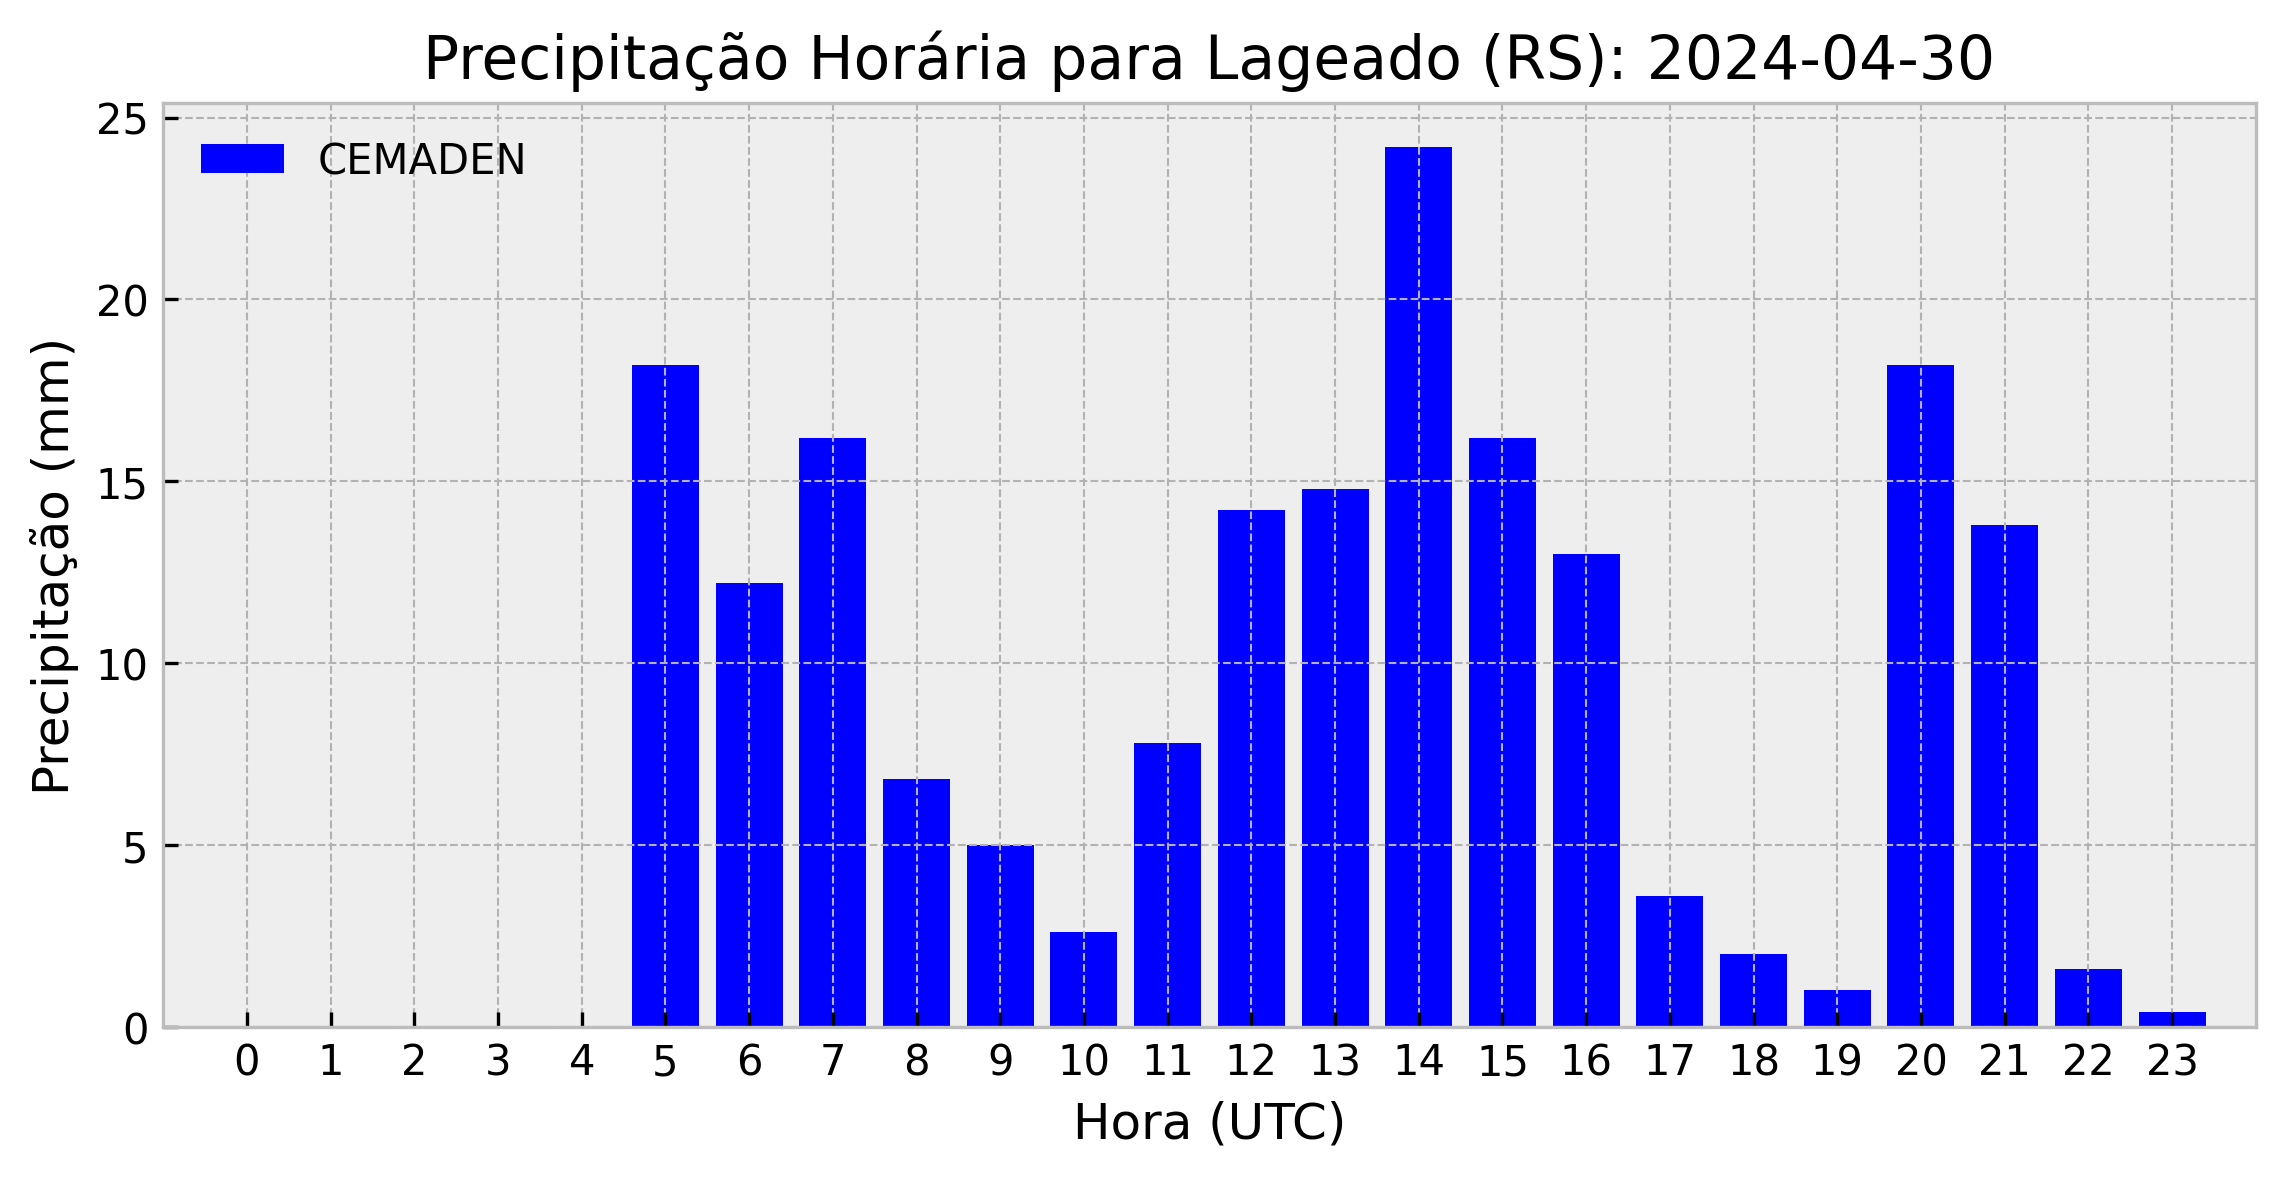

# **1° Passo:** Instalando bibliotecas

In [ ]:
# instalando a biblioteca cartopy
!pip install -q cartopy

# instalando a biblioteca Salem
!pip install -q rasterio pyproj geopandas salem descartes

# instalando a biblioteca de relevo
!pip install -q bmi-topography

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.3 MB/s eta 0:00:00


# **2° Passo:** Importando bibliotecas

Nesta etapa importaremos todas as bibliotecas necessárias para a nossa tarefa.

In [ ]:
import pandas as pd                        # biblioteca para trabalhar com planilhas excell
import matplotlib.pyplot as plt            # biblioteca para gerar gráficos
import numpy as np                         # biblioteca para trabalhar com matrizes
import cartopy, cartopy.crs as ccrs        # biblioteca para plotar mapas
import cartopy.io.shapereader as shpreader
from bmi_topography import Topography      # biblioteca para topografia
import salem
import time                                # biblioteca que conta o tempo de processamento

import warnings
warnings.filterwarnings("ignore")

# **3° Passo:** Baixando os dados das estações do CEMADEN

* Nesta etapa nós baixaremos os dados da estação localizada na cidade de **Lageado** no Estado do Rio Grande do Sul.
- Para isto, primeiramente você deverá acessar o [site](http://www2.cemaden.gov.br/mapainterativo/#) do CEMADEN e clicar na aba `Download de Dados`.
- Em seguida clicar em `Estações Pluviômétricas`, como indicado na imagem a seguir:

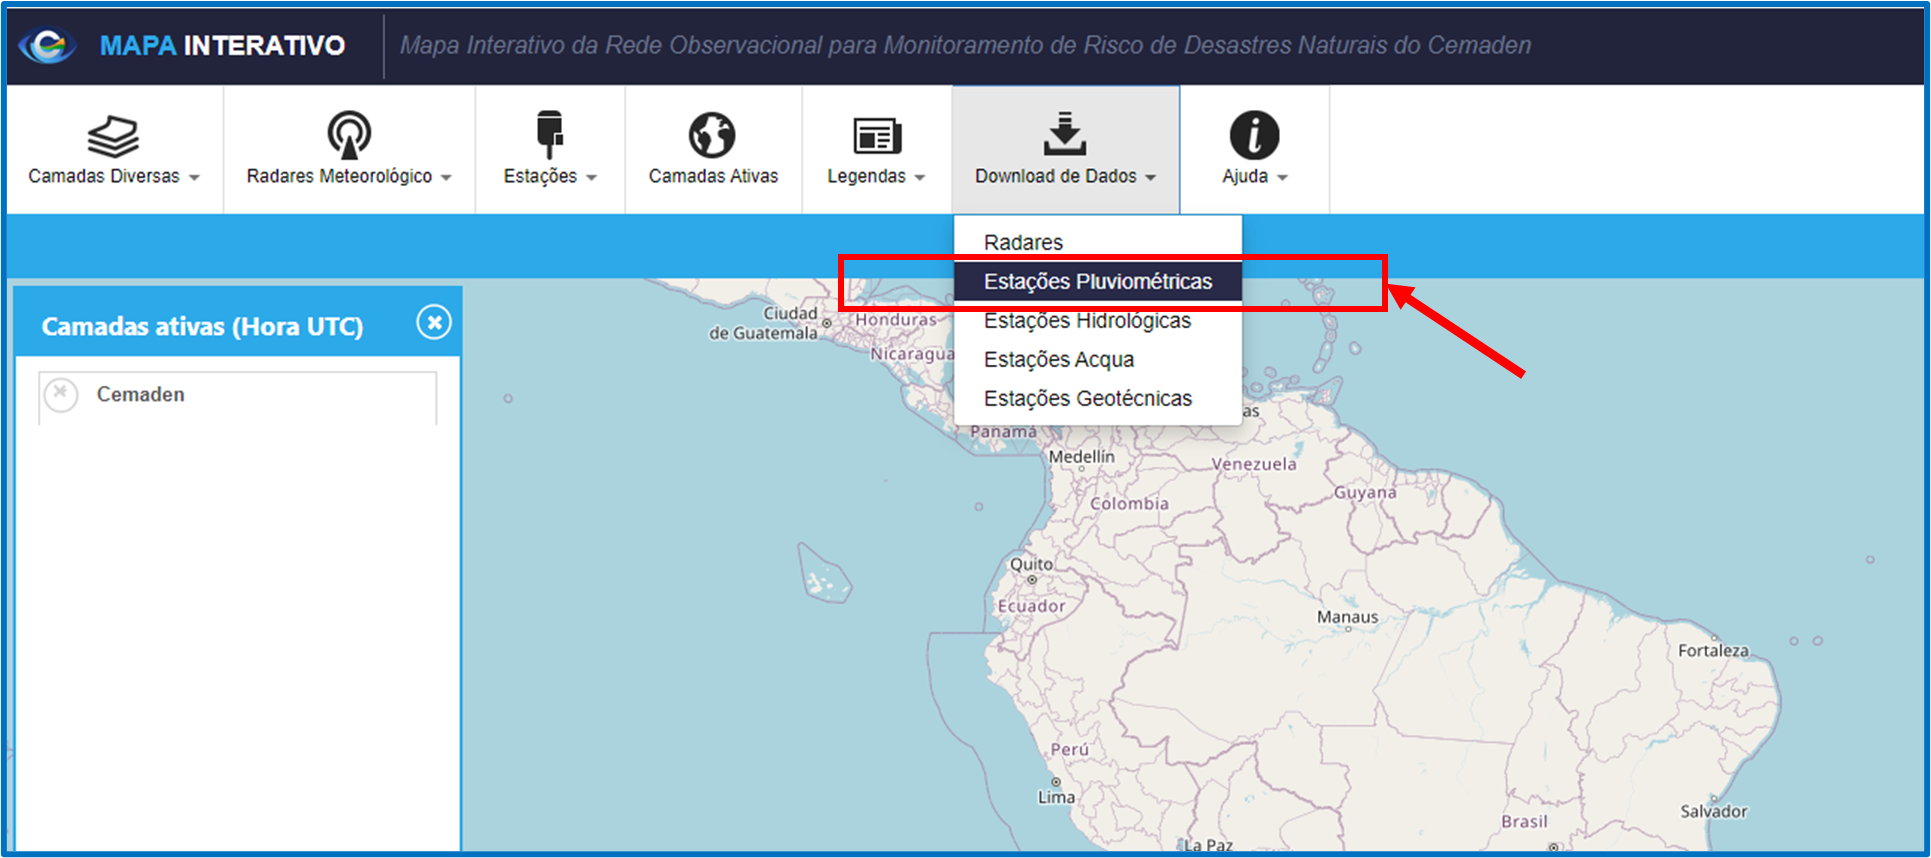

- Abrirá uma página para escolhermos qual estação do CEMADEN utilizaremos. Você deverá realizar as seguintes escolhas:
    1. **UF**: escolha a sigla `RS`.
    2. **Município**: escolha `LAJEADO`.
    3. **Mês**: escolha `Abril`.
    4. **Ano**: escolha `2024`.
    5. **Confirmação de segurança**: digite o texto que aparecerá na sua tela. **Observação**: o texto da imagem de vocês será diferente daquele mostrado na figura abaixo.


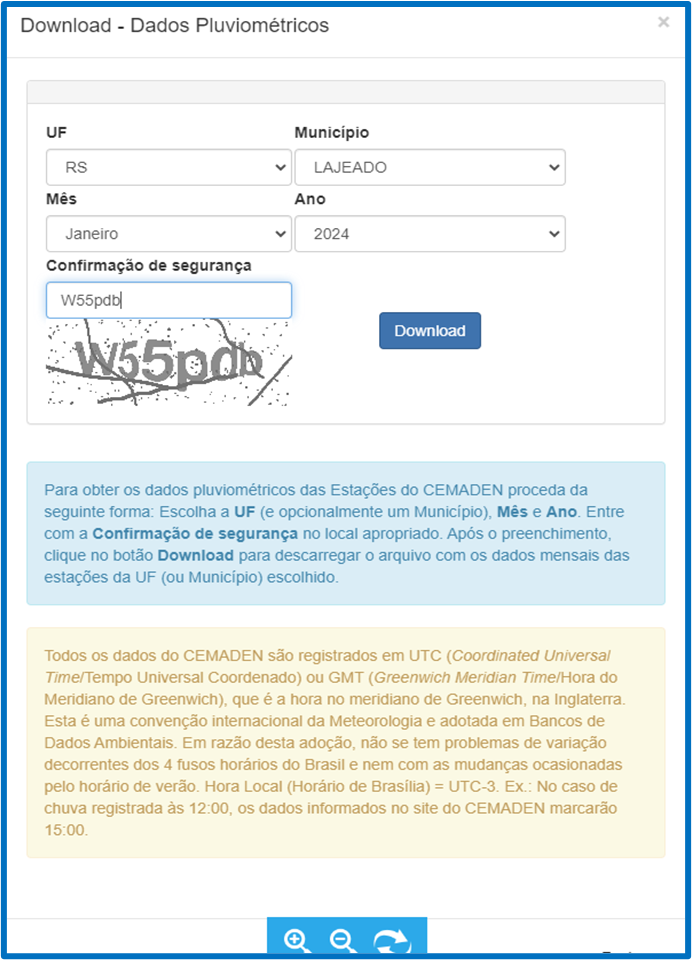

- Agora clicar no botão `Download`. Veja que a planilha com o nome `data.csv` foi baixada para a pasta *Download* do seu computador.

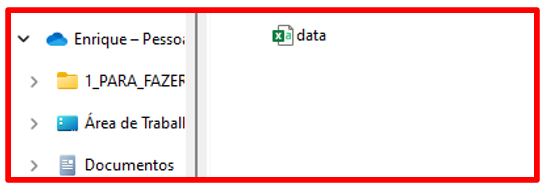

- Após esse passo, você deverá fazer o upload do arquivo para a sua sessão do Google Colab. Para isto você deverá clicar na seta localizada na parte esquerda da sua tela do Colab, e em seguida escolher o arquivo que tem o nome `data.csv`, aquele mesmo arquivo que foi baixado na pasta downloads do seu computador, como indicado na imagem a seguir:

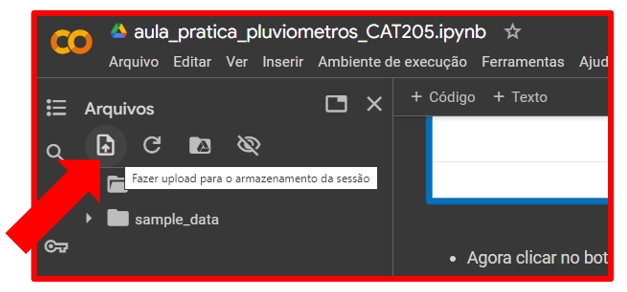

- Depois de fazer o upload do arquivo, veja que o arquivo ficará armazenado no `/content`, como indicado na imagem a seguir.

- Lembre-se que o  `/content` é a memória momentânea da sua sessão do Colab. O que significa que assim que você fechar a sua sessão do Colab, o arquivo será excluído dessa sessão automaticamente.   

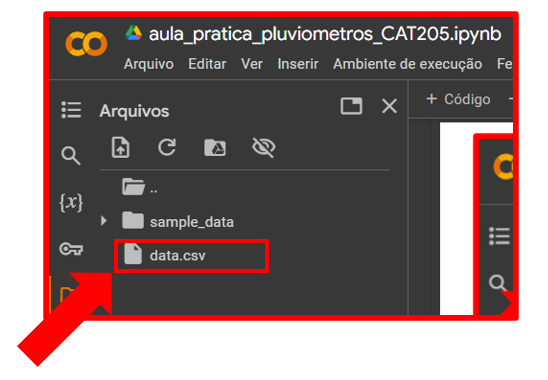

- Uma explicação detalhada de como baixar os dados do CEMADEN encontra-se clicando [aqui]() e as informações sobre os pluviômetros encontram-se [aqui](http://www2.cemaden.gov.br/pluviometros-automatico/)

- Agora que já estamos com o dado da estação pluviômétrica, vamos comecar a trabalhar com esses dados.

# **PARTE 1):** `Conhecendo` os dados da estação pluviômétrica

**Lendo o arquivo: `read_csv()`**

* Lendo a tabela com o comando **read_csv**. A tabela fica armazenada na variável **df** (df=DataFrame, significa tabela em português). Mas podemos colocar o nome que quisermos. Por exemplo: tabela, dados, raios e etc.
* Vejam como é simples. Com apenas **1 linha** fizemos a leitura do arquivo de relâmpagos. Essa é a **facilidade do Python** :)

In [ ]:
%%time
# leitura da planilha
df = pd.read_csv('data.csv', delimiter=';', decimal=',')

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 11.5 ms


In [ ]:
# mostrando a planilha completa
df

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 00:00:00.0,0.0
1,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 01:00:00.0,0.0
2,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 02:00:00.0,0.0
3,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 03:00:00.0,0.0
4,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 04:00:00.0,0.0
...,...,...,...,...,...,...,...,...
2560,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:40:00.0,4.4
2561,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:50:00.0,2.2
2562,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:00:00.0,1.4
2563,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:20:00.0,0.2


Visualizando as primeiras 5 linhas da tabela: comando `head()`

In [ ]:
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 00:00:00.0,0.0
1,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 01:00:00.0,0.0
2,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 02:00:00.0,0.0
3,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 03:00:00.0,0.0
4,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 04:00:00.0,0.0


Visualizando as últimas 5 linhas da tabela: comando `tail()`

In [ ]:
df.tail()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
2560,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:40:00.0,4.4
2561,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:50:00.0,2.2
2562,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:00:00.0,1.4
2563,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:20:00.0,0.2
2564,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 23:00:00.0,0.4


Mostrando o tipo das variáveis da tabela. Exemplo: inteiro, real e objeto: comando `info()`**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    2565 non-null   object 
 1   codEstacao   2565 non-null   object 
 2   uf           2565 non-null   object 
 3   nomeEstacao  2565 non-null   object 
 4   latitude     2565 non-null   float64
 5   longitude    2565 non-null   float64
 6   datahora     2565 non-null   object 
 7   valorMedida  2565 non-null   float64
dtypes: float64(3), object(5)
memory usage: 160.4+ KB


In [ ]:
df

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 00:00:00.0,0.0
1,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 01:00:00.0,0.0
2,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 02:00:00.0,0.0
3,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 03:00:00.0,0.0
4,LAJEADO,431140301A,RS,Santo Antonio,-29.487,-51.987,2024-04-01 04:00:00.0,0.0
...,...,...,...,...,...,...,...,...
2560,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:40:00.0,4.4
2561,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:50:00.0,2.2
2562,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:00:00.0,1.4
2563,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:20:00.0,0.2


Acessando as informações de uma columa específica

In [ ]:
df['nomeEstacao']

,nomeEstacao
0,Santo Antonio
1,Santo Antonio
2,Santo Antonio
3,Santo Antonio
4,Santo Antonio
...,...
2560,Moinhos D´Agua
2561,Moinhos D´Agua
2562,Moinhos D´Agua
2563,Moinhos D´Agua


Quantidade de informações únicas de uma coluna

In [ ]:
df['nomeEstacao'].unique()

array(['Santo Antonio', 'Centro', 'Moinhos D´Agua'], dtype=object)

Selecionando os valores da estação `Moinhos D´Agua`

In [ ]:
df['nomeEstacao'] == 'Moinhos D´Agua'

,nomeEstacao
0,False
1,False
2,False
3,False
4,False
...,...
2560,True
2561,True
2562,True
2563,True


In [ ]:
condicao = df['nomeEstacao'] == 'Moinhos D´Agua'

In [ ]:
df[condicao]

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
1548,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 00:00:00.0,0.0
1549,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 01:00:00.0,0.0
1550,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 02:00:00.0,0.0
1551,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 03:00:00.0,0.0
1552,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 04:00:00.0,0.0
...,...,...,...,...,...,...,...,...
2560,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:40:00.0,4.4
2561,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:50:00.0,2.2
2562,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:00:00.0,1.4
2563,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:20:00.0,0.2


In [ ]:
df_moinhosdagua = df[condicao]
df_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
1548,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 00:00:00.0,0.0
1549,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 01:00:00.0,0.0
1550,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 02:00:00.0,0.0
1551,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 03:00:00.0,0.0
1552,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 04:00:00.0,0.0
...,...,...,...,...,...,...,...,...
2560,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:40:00.0,4.4
2561,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:50:00.0,2.2
2562,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:00:00.0,1.4
2563,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:20:00.0,0.2


Somando os valores da coluna `valorMedida`. Iremos utilizar o método `sum`. Será mostrado a soma da chuva da coluna inteira. Nesse caso o mês de abril de 2024 apresentou um total de 555,4 mm de chuva.

In [ ]:
df_moinhosdagua['valorMedida'].sum()

555.4

# **PARTE 2):** Mapa com a `localização da estação pluviômétrica`

In [ ]:
df_moinhosdagua.head()

http://www2.cemaden.gov.br/pluviometros-automatico/

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
1548,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 00:00:00.0,0.0
1549,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 01:00:00.0,0.0
1550,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 02:00:00.0,0.0
1551,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 03:00:00.0,0.0
1552,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 04:00:00.0,0.0


In [ ]:
df_moinhosdagua.iloc[0, 4]

-29.452

In [ ]:
df_moinhosdagua.iloc[0, 5]

-52.003

In [ ]:
# salvando a latitude da estação
lat_moinhosdagua = df_moinhosdagua.iloc[0, 4]

# salvando a longitude da estação
lon_moinhosdagua = df_moinhosdagua.iloc[0, 5]

# mostrando na tela o valor da latitude e longitude da estação
print(lat_moinhosdagua, lon_moinhosdagua)

-29.452 -52.003


CPU times: user 13.5 s, sys: 2.15 s, total: 15.6 s
Wall time: 16.5 s


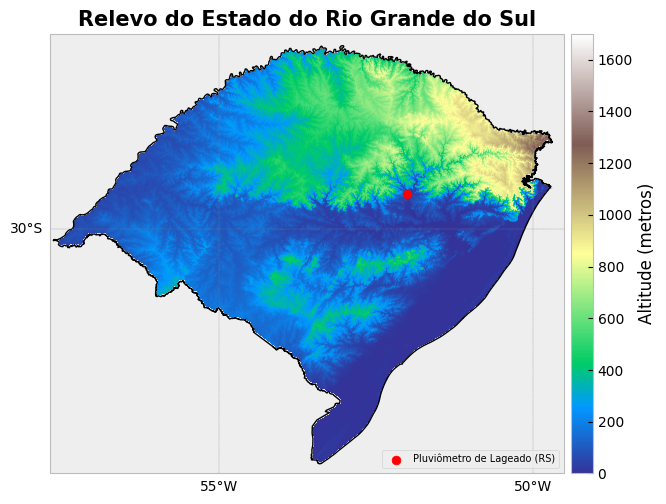

In [ ]:
%%time
# tamanho da figura
plt.figure(figsize=(7,7))

# define a projeção do mapa
ax = plt.axes(projection=ccrs.PlateCarree())

# define os limites de latitudes e longitudes da figura
lonmin, lonmax, latmin, latmax = -57.7, -49.5, -33.9, -26.9

# leitura do dado de relevo
topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")
relevo = topo.load()

# leitura do contorno do RS
contorno_RS = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/RS/RS_UF_2019.shp')

# plota mapa de relevo
img = ax.imshow(relevo[0,:,:].salem.roi(shape=contorno_RS),
                cmap='terrain',
                vmin=0, vmax=1700,
                extent=[lonmin, lonmax, latmin, latmax])

# plota localização da estação pluviômétrica de Lageado
plt.scatter(lon_moinhosdagua, lat_moinhosdagua, transform=ccrs.PlateCarree(), marker='o', s=40, color='red', zorder=2, label=f'Pluviômetro de Lageado (RS)')

# adiciona as linhas de grades
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# plota contorno do Estado do RS
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/UFs/RS/RS_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0)

# adiciona a barra de cores
plt.colorbar(img, label='Altitude (metros)', orientation='vertical', pad=0.012, fraction=0.0405)

# adiciona a legenda
ax.legend(loc='lower right', ncols=1, frameon=True, fontsize=7)

# adiciona o título
plt.title(f'Relevo do Estado do Rio Grande do Sul', fontweight='bold', fontsize=15, loc='center')

# salva a figura
plt.savefig('Figura_1_mapa_localizacao_da_estacao.png', bbox_inches='tight', dpi=300)

# **PARTE 3):** Gráfico da quantidade de precipitação `por dia`

In [ ]:
df_moinhosdagua.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
1548,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 00:00:00.0,0.0
1549,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 01:00:00.0,0.0
1550,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 02:00:00.0,0.0
1551,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 03:00:00.0,0.0
1552,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 04:00:00.0,0.0


In [ ]:
df_moinhosdagua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017 entries, 1548 to 2564
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    1017 non-null   object 
 1   codEstacao   1017 non-null   object 
 2   uf           1017 non-null   object 
 3   nomeEstacao  1017 non-null   object 
 4   latitude     1017 non-null   float64
 5   longitude    1017 non-null   float64
 6   datahora     1017 non-null   object 
 7   valorMedida  1017 non-null   float64
dtypes: float64(3), object(5)
memory usage: 103.8+ KB


In [ ]:
# insere a coluna data como DateTime no DataFrame
df_moinhosdagua['datahora'] = pd.to_datetime(df_moinhosdagua['datahora'])
df_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
1548,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 00:00:00,0.0
1549,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 01:00:00,0.0
1550,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 02:00:00,0.0
1551,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 03:00:00,0.0
1552,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-01 04:00:00,0.0
...,...,...,...,...,...,...,...,...
2560,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:40:00,4.4
2561,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 21:50:00,2.2
2562,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:00:00,1.4
2563,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2024-04-30 22:20:00,0.2


In [ ]:
df_moinhosdagua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017 entries, 1548 to 2564
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   municipio    1017 non-null   object        
 1   codEstacao   1017 non-null   object        
 2   uf           1017 non-null   object        
 3   nomeEstacao  1017 non-null   object        
 4   latitude     1017 non-null   float64       
 5   longitude    1017 non-null   float64       
 6   datahora     1017 non-null   datetime64[ns]
 7   valorMedida  1017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 103.8+ KB


In [ ]:
# seta a coluna data com o index do dataframe
df_moinhosdagua.set_index('datahora', inplace=True)
df_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-01 00:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 01:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 02:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 03:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 04:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:40:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,4.4
2024-04-30 21:50:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2.2
2024-04-30 22:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,1.4


In [ ]:
# agrupa os dados
df_moinhosdagua_dia = df_moinhosdagua.resample('1D').sum()['valorMedida']
# df_moinhosdagua_dia = df_moinhosdagua.groupby(pd.Grouper(freq='1D')).sum()['valorMedida']
df_moinhosdagua_dia

,valorMedida
datahora,
2024-04-01,4.8
2024-04-02,0.2
2024-04-03,0.0
2024-04-04,0.0
2024-04-05,0.6
2024-04-06,0.2
2024-04-07,79.0
2024-04-08,0.0
2024-04-09,0.0


Agora iremos plotar nosso gráfico da chuva por dia

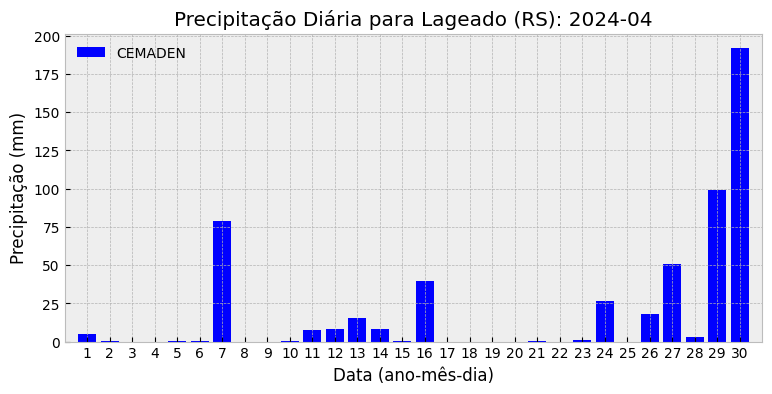

CPU times: user 1.33 s, sys: 58.6 ms, total: 1.39 s
Wall time: 2.38 s


In [ ]:
%%time
# tamanho da figura
fig, ax = plt.subplots(figsize=(9,4))

# latyout do gráfico
plt.style.use('bmh')

# gera figura
ax.bar(np.arange(1, 31, 1), df_moinhosdagua_dia.values, color='blue', label='CEMADEN')

# configuração dos eixos
ax.set(xlim=(0, 31),
       xlabel='Data (ano-mês-dia)',
       ylabel='Precipitação (mm)',
       title='Precipitação Diária para Lageado (RS): 2024-04',
       xticks=np.arange(1, 31, 1),
       xticklabels=[str(i) for i in np.arange(1, 31, 1)])

# adiciona legenda
ax.legend(loc='upper left', frameon=False)

# salva figura
plt.savefig('Figura_2_precipitacao_por_dia.png', bbox_inches='tight', dpi=300)

# mostra na tela a figura
plt.show()

# **PARTE 4):** Gráfico da quantidade de precipitação `por hora`

In [ ]:
df_moinhosdagua_dia

,valorMedida
datahora,
2024-04-01,4.8
2024-04-02,0.2
2024-04-03,0.0
2024-04-04,0.0
2024-04-05,0.6
2024-04-06,0.2
2024-04-07,79.0
2024-04-08,0.0
2024-04-09,0.0


In [ ]:
df_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-01 00:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 01:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 02:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 03:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-01 04:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:40:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,4.4
2024-04-30 21:50:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2.2
2024-04-30 22:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,1.4


In [ ]:
df_moinhosdagua.loc['2024-04-30']

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-30 00:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 01:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 02:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 03:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 04:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:40:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,4.4
2024-04-30 21:50:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2.2
2024-04-30 22:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,1.4


In [ ]:
df_moinhosdagua_30abril = df_moinhosdagua.loc['2024-04-30']
df_moinhosdagua_30abril

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-30 00:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 01:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 02:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 03:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
2024-04-30 04:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:40:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,4.4
2024-04-30 21:50:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,2.2
2024-04-30 22:00:00,LAJEADO,431140303A,RS,Moinhos D´Agua,-29.452,-52.003,1.4


In [ ]:
# agrupa os dados por HORA
df_moinhosdagua_30abril_hora = df_moinhosdagua_30abril.resample('1H').sum()['valorMedida']
df_moinhosdagua_30abril_hora

,valorMedida
datahora,
2024-04-30 00:00:00,0.0
2024-04-30 01:00:00,0.0
2024-04-30 02:00:00,0.0
2024-04-30 03:00:00,0.0
2024-04-30 04:00:00,0.0
2024-04-30 05:00:00,18.2
2024-04-30 06:00:00,12.2
2024-04-30 07:00:00,16.2
2024-04-30 08:00:00,6.8


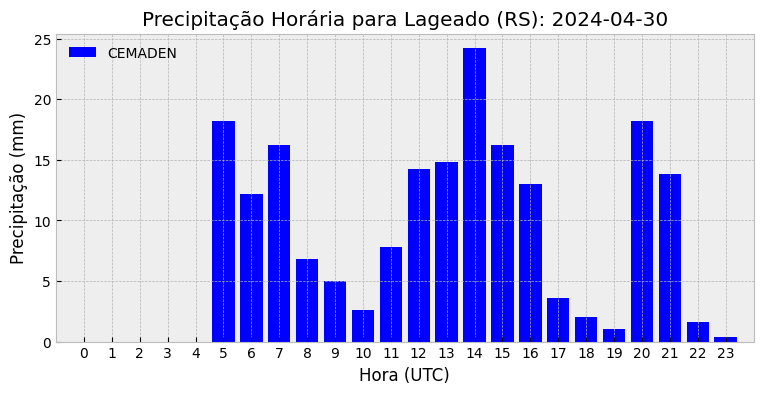

CPU times: user 1.2 s, sys: 103 ms, total: 1.3 s
Wall time: 1.52 s


In [ ]:
%%time
# tamanho da figura
fig, ax = plt.subplots(figsize=(9,4))

# layout do gráfico
plt.style.use('bmh')

# plota figura
ax.bar(np.arange(0, 24, 1), df_moinhosdagua_30abril_hora.values, color='blue', label='CEMADEN')

# configuração dos eixos
ax.set(xlim=(-1, 24),
       xlabel='Hora (UTC)',
       ylabel='Precipitação (mm)',
       title='Precipitação Horária para Lageado (RS): 2024-04-30',
       xticks=np.arange(0, 24, 1),
       xticklabels=[str(i) for i in np.arange(0, 24, 1)])

# adiciona legenda
ax.legend(loc='upper left', frameon=False)

# salva figura
plt.savefig('Figura_3_precipitacao_por_hora.png', bbox_inches='tight', dpi=300)

# mostra na tela a figura
plt.show()